# 20161014 - EWZ IV SMILE

In [1]:
import sys
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\options\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PrintPlot\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\Options\src')
trade_data_path = r'E:\Datos\jupyter notebooks\trading\data\\'
from PlotSignal.Csv_mngt import Csv_mngt
from  PlotSignal.PrintPlot import PrintPlot
from PlotSignal.PrintTrading import PrintTrading
import numpy as np
import mpld3
from datetime import datetime, time
from matplotlib.dates import  date2num
from Options.Value import Calculate
%matplotlib inline
mpld3.enable_notebook()

## INPUT DATA

In [2]:
###################################################################################################################
csv_file = '20161014 EWZ IV smile data.csv'
###################################################################################################################

data_csv = Csv_mngt()
data_csv.set_data(trade_data_path + csv_file,';')

smile_file = data_csv.extract_data_row('FIELD','smile_file','VALUE')
print('smile_file = ' + smile_file)
smile_file_path = data_csv.extract_data_row('FIELD','smile_file_path','VALUE')
print('smile_file_path = ' + smile_file_path)
option_type = data_csv.extract_data_row('FIELD','option_type','VALUE')
print('option_type = ' + option_type)
expiration = datetime(int(data_csv.extract_data_row('FIELD','expiration_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_dd','VALUE')), 16, 0, 0)
print('expiration = ' + str(expiration))
entry_date_buy = datetime(int(data_csv.extract_data_row('FIELD','entry_date_yy_buy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_mm_buy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_dd_buy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_hh_buy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_MM_buy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_ss_buy','VALUE')))
print('entry_date_buy = ' + str(entry_date_buy))
trading_day_buy = entry_date_buy.date()
print('trading_day_buy = ' + str(trading_day_buy))
entry_date_write = datetime(int(data_csv.extract_data_row('FIELD','entry_date_yy_write','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_mm_write','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_dd_write','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_hh_write','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_MM_write','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_ss_write','VALUE')))
print('entry_date_write = ' + str(entry_date_write))
trading_day_write = entry_date_write.date()
print('trading_day_write = ' + str(trading_day_write))
ticker = data_csv.extract_data_row('FIELD','ticker','VALUE')
print('ticker = ' + str(ticker))
historical_volatility = float(data_csv.extract_data_row('FIELD','historical_volatility','VALUE').replace(',','.'))
print('historical_volatility = ' + str(historical_volatility))
strike_buy = data_csv.extract_data_row('FIELD','strike_buy','VALUE')
print('strike_buy = ' + str(strike_buy))
strike_write = data_csv.extract_data_row('FIELD','strike_write','VALUE')
print('strike_write = ' + str(strike_write))

smile_file = 20161014 EWZ
smile_file_path = E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20161014
option_type = put
expiration = 2016-10-21 16:00:00
entry_date_buy = 2016-10-14 09:50:23
trading_day_buy = 2016-10-14
entry_date_write = 2016-10-14 09:58:14
trading_day_write = 2016-10-14
ticker = EWZ
historical_volatility = 0.0
strike_buy = 35
strike_write = 36


### Get Data

In [3]:
csv = Csv_mngt()
csv.set_data(smile_file_path + '\\Tablas\\' + smile_file + '.txt',';')
# clean up of the csv deleting rows with no time entry
time_list=csv.extract_data_col('Time')
for each in time_list:
    try:
        time_conversion=datetime.strptime(each, '%H:%M:%S')
    except ValueError:
        csv.delete_data_row('Time',each)
time_list=csv.extract_data_col('Time')
bid_str = csv.extract_data_col('Bid Underlier')
for i, each in enumerate(bid_str):
    try:
        bid_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            bid_str[i] = bid_str[i-1]
        else:
            bid_str[i] = 0
    finally:
        if bid_str[i] == 0 and i > 0:
            bid_str[i] = bid_str[i-1]
bid_list = np.asarray(bid_str)
ask_str = csv.extract_data_col('Ask Underlier')
for i, each in enumerate(ask_str):
    try:
        ask_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            ask_str[i] = ask_str[i-1]
        else:
            ask_str[i] = 0
    finally:
        if ask_str[i] == 0 and i > 0:
            ask_str[i] = ask_str[i-1]
ask_list = np.asarray(ask_str)

# get the list of strikes
strike_str = csv.extract_data_col('Strike')
for i, each in enumerate(strike_str):
    try:
        strike_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            strike_str[i] = strike_str[i-1]
        else:
            strike_str[i] = 0
    finally:
        if strike_str[i] == 0 and i > 0:
            strike_str[i] = strike_str[i-1]
strike_list = np.asarray(strike_str)
strikes = sorted(set(strike_list), reverse=True)
print('Strikes detected: ' + str(strikes))
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    try:
        clean_target_str.append(float(each.replace(',','.')))
    except ValueError:
        clean_target_str.append(0)
target_list = np.asarray(clean_target_str)
time_list = csv.date2num_list(time_list, '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
bid_option_str = csv.extract_data_col('Bid')
bid_option = np.asarray([float(x.replace(',','.')) for x in bid_option_str])
ask_option_str = csv.extract_data_col('Ask')
ask_option = np.asarray([float(x.replace(',','.')) for x in ask_option_str])

Strikes detected: [38.0, 37.5, 37.0, 36.5, 36.0, 35.5, 35.0, 34.5, 34.0]


## ASK & BID

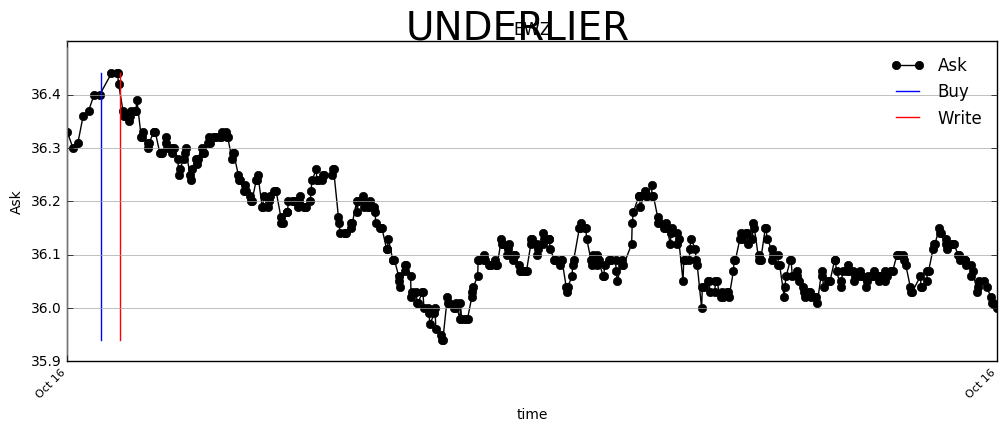

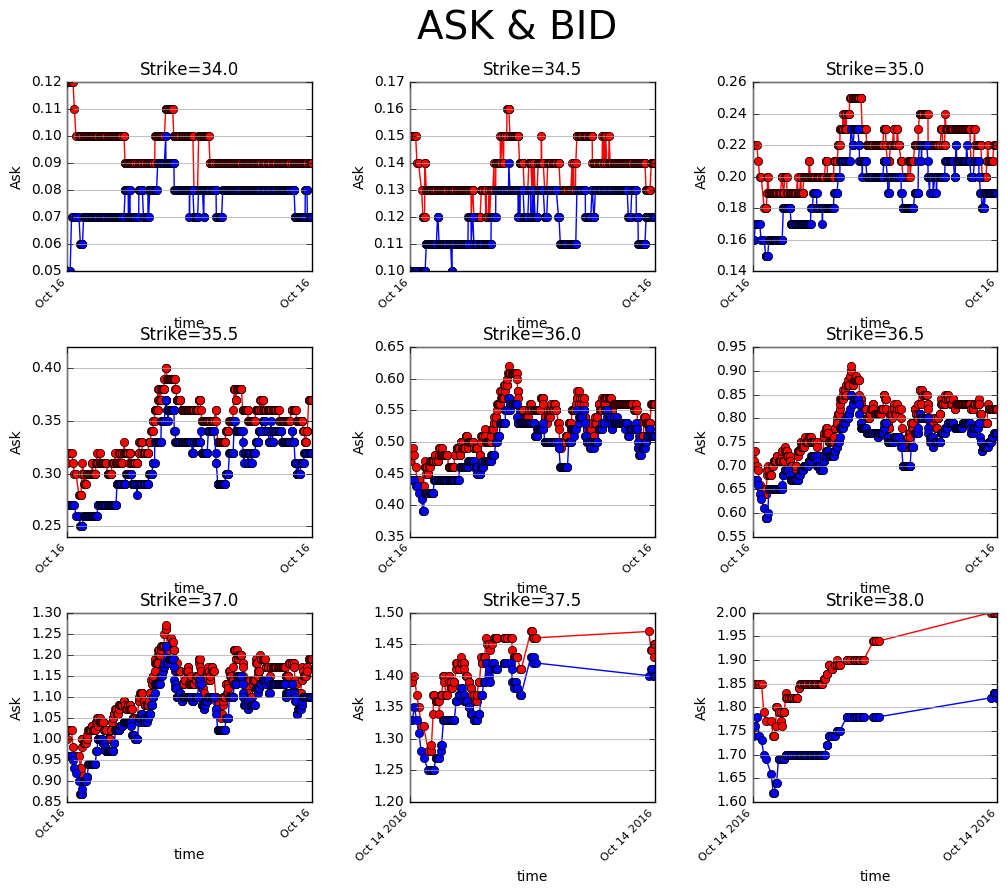

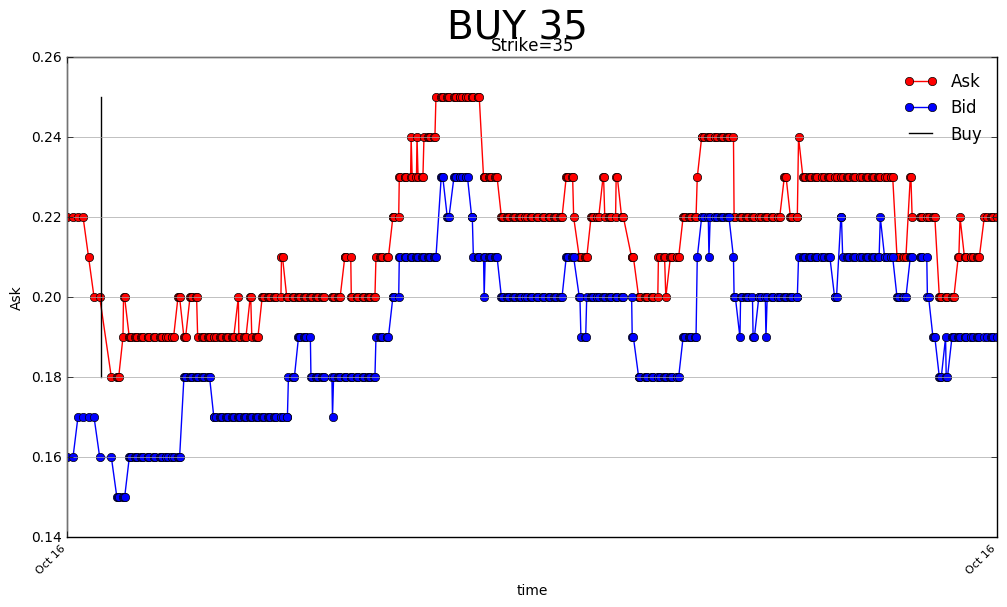

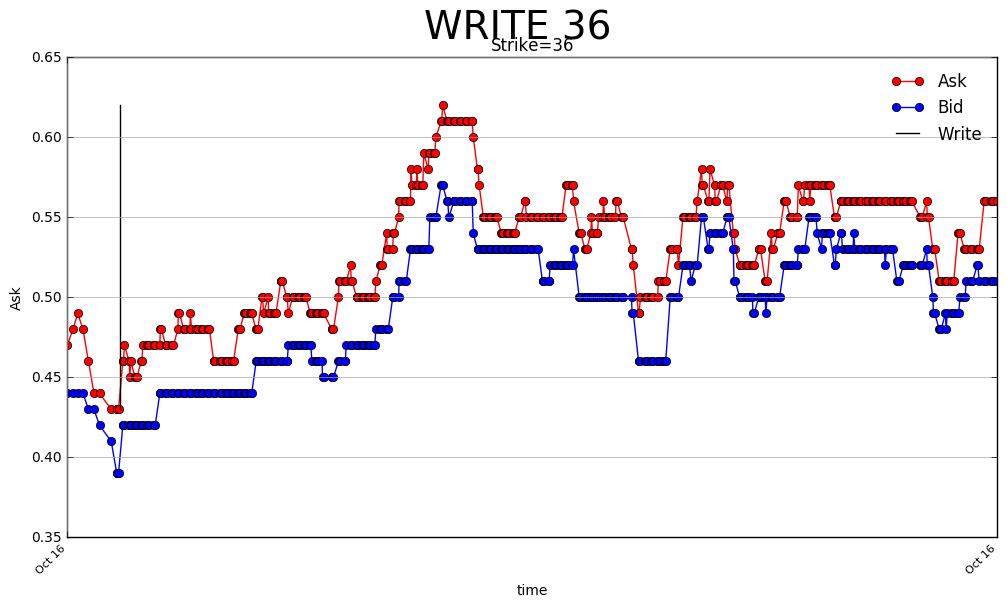

entry_date_buy = 2016-10-14 09:50:23
entry_date_write = 2016-10-14 09:58:14
underlying open = 36.33
underlying close = 36.0


In [4]:
clean_time_list = []
clean_ask_underlier = []
for i,v in enumerate(time_list):
    if v not in clean_time_list:
        clean_time_list.append(v)
        clean_ask_underlier.append(ask_list[i])
clean_time_list = np.asarray(clean_time_list)
clean_ask_underlier = np.asarray(clean_ask_underlier)
graph_underlier = PrintPlot(fig_size = (12, 4), nrows = 1, ncols = 1, figure_title = "UNDERLIER")
graph_underlier.init_plot(clean_time_list, clean_ask_underlier, trace_type = 'ko-', data_name = 'Ask' , x_name = 'time',
                               title_plot = ticker, log_y = False, nplot = 1,
                               show_legend = True)
mark_entry_buy = np.asarray([date2num(entry_date_buy), date2num(entry_date_buy)])
mark_entry_write = np.asarray([date2num(entry_date_write), date2num(entry_date_write)])
graph_underlier.append_signal(mark_entry_buy,
                              np.asarray([np.min(clean_ask_underlier), np.max(clean_ask_underlier)]),
                              trace_type = 'b-', trace_name = 'Buy')    
graph_underlier.append_signal(mark_entry_write,
                              np.asarray([np.min(clean_ask_underlier), np.max(clean_ask_underlier)]),
                              trace_type = 'r-', trace_name = 'Write')    
graph_underlier.show()
strikes = sorted(set(strike_list), reverse=True)
strike_time = []
ask_value = []
n_graphs = len(strikes)
n_rows = int(n_graphs ** 0.5)
n_cols = int(n_graphs / n_rows)
if n_cols < 4:
    if (n_graphs % n_rows):
        n_cols += 1
else:
    n_cols = 3
    n_rows = int(n_graphs / n_cols) + 1
figure_height = n_rows * 3
graph_option_ask = PrintPlot(fig_size = (12, figure_height), nrows = n_rows, ncols = n_cols, figure_title = "ASK & BID")
   
for ngraphs in range(1,n_graphs+1):
    strike_value = strikes.pop()
    strike_time = []
    ask_value = []
    bid_value = []
    for i,v in enumerate(strike_list):
        if v == strike_value:
            strike_time.append(time_list[i])
            ask_value.append(ask_option[i])
            bid_value.append(bid_option[i])
    strike_time = np.asarray(strike_time)
    ask_value = np.asarray(ask_value)
    bid_value = np.asarray(bid_value)
    if float(strike_value) == float(strike_buy):
        strike_time_buy, ask_value_buy, bid_value_buy = strike_time, ask_value, bid_value
    if float(strike_value) == float(strike_write):
        strike_time_write, ask_value_write, bid_value_write = strike_time, ask_value, bid_value
    graph_option_ask.init_plot(strike_time, ask_value, trace_type = 'ro-', data_name = 'Ask' , x_name = 'time',
                               title_plot = 'Strike=' + str(strike_value), log_y = False, nplot = ngraphs,
                               show_legend = False)
    graph_option_ask.append_trace(bid_value, trace_type = 'bo-', trace_name = 'Bid')  
graph_option_ask.show()

graph_option_buy = PrintPlot(fig_size = (12, 6), figure_title = "BUY " + str(strike_buy))
graph_option_buy.init_plot(strike_time_buy, ask_value_buy, trace_type = 'ro-', data_name = 'Ask' , x_name = 'time',
                               title_plot = 'Strike=' + str(strike_buy), log_y = False, show_legend = True)
graph_option_buy.append_trace(bid_value_buy, trace_type = 'bo-', trace_name = 'Bid')
graph_option_buy.append_signal(mark_entry_buy,
                              np.asarray([np.min(ask_value_buy), np.max(ask_value_buy)]),
                              trace_type = 'k-', trace_name = 'Buy')
graph_option_buy.show()
graph_option_write = PrintPlot(fig_size = (12, 6), figure_title = "WRITE " + str(strike_write))
graph_option_write.init_plot(strike_time_write, ask_value_write, trace_type = 'ro-', data_name = 'Ask' , x_name = 'time',
                               title_plot = 'Strike=' + str(strike_write), log_y = False, show_legend = True)
graph_option_write.append_trace(bid_value_write, trace_type = 'bo-', trace_name = 'Bid')
graph_option_write.append_signal(mark_entry_write,
                              np.asarray([np.min(ask_value_write), np.max(ask_value_write)]),
                              trace_type = 'k-', trace_name = 'Write')  
graph_option_write.show()

print('entry_date_buy = ' + str(entry_date_buy))
print('entry_date_write = ' + str(entry_date_write))
print('underlying open = ' + str(ask_list[0]))
print('underlying close = ' + str(ask_list[-1]))

## IV smiles

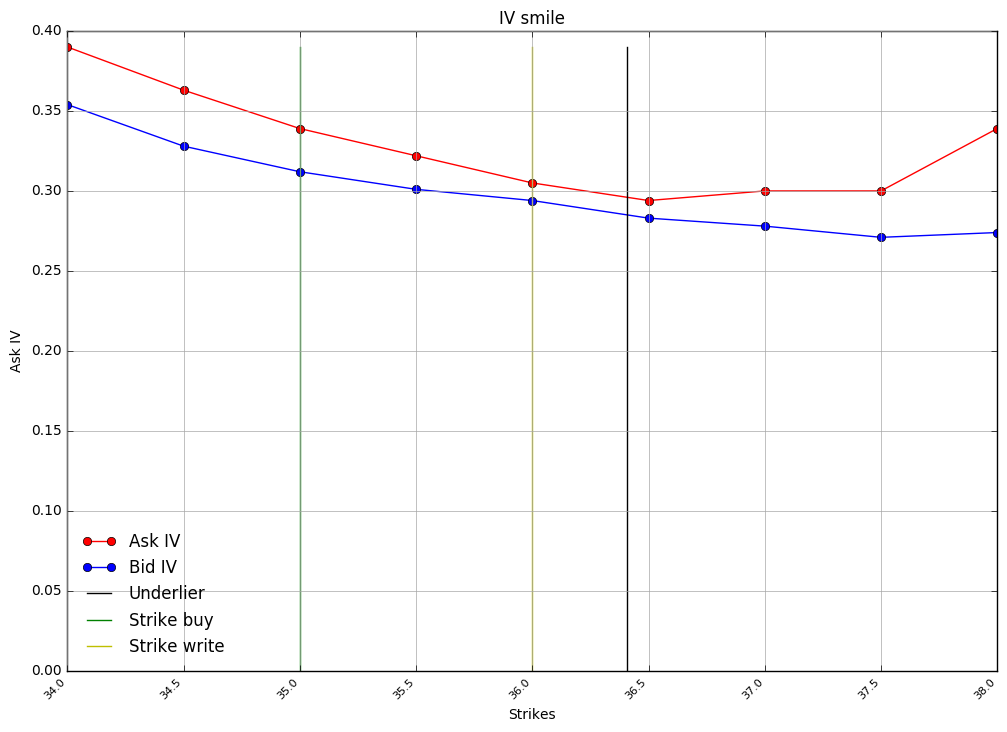

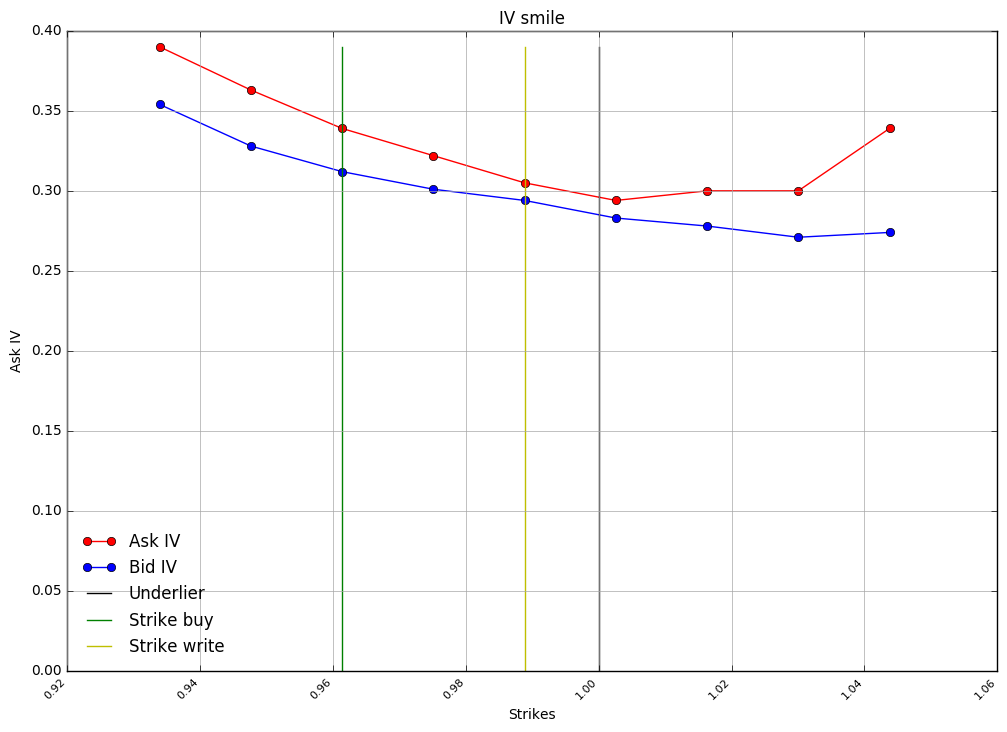

entry_IV_buy = 0.339
entry_IV_write write = 0.285
delta_IV (buy-write) = 5.400%


In [5]:
strikes = sorted(set(strike_list))
time_IV_time = entry_date_buy
time_IV = date2num(time_IV_time)
ask_IV_list, bid_IV_list, strike_value_list, under_IV_list  = [], [], [], []
for strike_IV in strikes:
    ask_value, bid_value, strike_time, under_value  = [], [], [], []
    # extract the strike information from the data
    for i,v in enumerate(strike_list):
        if v == strike_IV:        
            strike_time.append(time_list[i])
            under_value.append(ask_list[i])
            ask_value.append(ask_option[i])
            bid_value.append(bid_option[i])
    # look for the closest point to time_IV
    is_found = False;
    for i, v in enumerate(strike_time):
        if time_IV < v:
            is_found = True
            break
    """
    print(str(strike_time[i-1]))
    print(str(time_IV))
    print(str(strike_time[i]))
    """
    # calculate closest point
    if not is_found:
        under_IV=under_value[-1]
        ask_IV=ask_value[-1]
        bid_IV=bid_option[-1]
        time_IV=strike_time[-1]
    elif i==0:
        under_IV=under_value[0]
        ask_IV=ask_value[0]
        bid_IV=bid_option[0]
        time_IV=strike_time[0]
    else:
        # extrapolation
        m = (under_value[i] - under_value[i-1]) / (strike_time[i] - strike_time[i-1])
        under_IV = m * (time_IV-strike_time[i-1]) + under_value[i-1]

        m = (ask_value[i] - ask_value[i-1]) / (strike_time[i] - strike_time[i-1])
        ask_IV = m * (time_IV-strike_time[i-1]) + ask_value[i-1]

        m = (bid_value[i] - bid_value[i-1]) / (strike_time[i] - strike_time[i-1])
        bid_IV = m * (time_IV-strike_time[i-1]) + bid_value[i-1]
    
    time_to_exp = date2num(expiration)-time_IV
    under_IV_list.append(under_IV)
    ask_IV_calculated = Calculate().find_IV(option_type, ask_IV, under_IV, strike_IV, time_to_exp)
    ask_IV_list.append(ask_IV_calculated)
    if float(strike_buy)==strike_IV:
        entry_IV_buy = ask_IV_calculated
        #print('under_IV buy = ' + str(under_IV))
        #print('ask_IV buy = ' + str(ask_IV))
        #print('entry_IV_buy = ' + str(entry_IV_buy))
    bid_IV_calculated = Calculate().find_IV(option_type, bid_IV, under_IV, strike_IV, time_to_exp)
    bid_IV_list.append(bid_IV_calculated)
    strike_value_list.append(strike_IV)
graph_IV = PrintPlot(fig_size=(12,8))
graph_IV.init_plot(np.asarray(strike_value_list), np.asarray(ask_IV_list), trace_type = 'ro-', data_name = 'Ask IV',
                   x_name = 'Strikes', title_plot = 'IV smile', are_dates = False)
graph_IV.append_trace(np.asarray(bid_IV_list), trace_type = 'bo-', trace_name = 'Bid IV')
graph_IV.append_signal(np.asarray([under_IV, under_IV]), np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                       trace_type = 'k-', trace_name = 'Underlier')
graph_IV.append_signal(np.asarray([strike_buy, strike_buy]), np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                       trace_type = 'g-', trace_name = 'Strike buy')
graph_IV.append_signal(np.asarray([strike_write, strike_write]),
                       np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                       trace_type = 'y-', trace_name = 'Strike write')
graph_IV.show()

# Normalized graph
graph_IV_norm = PrintPlot(fig_size=(12,8))
strike_value_list_norm = np.asarray(strike_value_list) / under_IV
graph_IV_norm.init_plot(strike_value_list_norm, np.asarray(ask_IV_list), trace_type = 'ro-', data_name = 'Ask IV',
                   x_name = 'Strikes', title_plot = 'IV smile', are_dates = False)
graph_IV_norm.append_trace(np.asarray(bid_IV_list), trace_type = 'bo-', trace_name = 'Bid IV')
graph_IV_norm.append_signal(np.asarray([1, 1]),
                            np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                            trace_type = 'k-', trace_name = 'Underlier')
graph_IV_norm.append_signal(np.asarray([float(strike_buy)/under_IV, float(strike_buy)/under_IV]),
                            np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                            trace_type = 'g-', trace_name = 'Strike buy')
graph_IV_norm.append_signal(np.asarray([float(strike_write)/under_IV, float(strike_write)/under_IV]),
                            np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                            trace_type = 'y-', trace_name = 'Strike write')
graph_IV_norm.show()
# Calculate delta buy write
# First calculate IV at write leg
ask_value, bid_value, strike_time, under_value  = [], [], [], []
time_write = date2num(entry_date_write)
for i,v in enumerate(strike_list):
    if v == float(strike_write):        
        strike_time.append(time_list[i])
        under_value.append(ask_list[i])
        ask_value.append(ask_option[i])
        bid_value.append(bid_option[i])
is_found = False;
for i, v in enumerate(strike_time):
    if  time_write < v:
        is_found = True
        break
if not is_found:
        under_IV=under_value[-1]
        ask_IV=ask_value[-1]
        bid_IV=bid_option[-1]
        time_IV=strike_time[-1]
elif i==0:
    under_IV=under_value[0]
    ask_IV=ask_value[0]
    bid_IV=bid_option[0]
    time_IV=strike_time[0]
else:
    # extrapolation
    m = (under_value[i] - under_value[i-1]) / (strike_time[i] - strike_time[i-1])
    under_IV = m * (time_write-strike_time[i-1]) + under_value[i-1]

    m = (ask_value[i] - ask_value[i-1]) / (strike_time[i] - strike_time[i-1])
    ask_IV = m * (time_write-strike_time[i-1]) + ask_value[i-1]

    m = (bid_value[i] - bid_value[i-1]) / (strike_time[i] - strike_time[i-1])
    bid_IV = m * (time_write-strike_time[i-1]) + bid_value[i-1]
    #print(i)
    #print('strike_time[i-1] = ' + str(strike_time[i-1]) + ' under_value[i-1] = ' + str(under_value[i-1]))
    #print('time_write = ' + str(time_write) + ' under_IV = ' + str(under_IV))
    #print('strike_time[i] = ' +str(strike_time[i]) + ' under_value[i] = ' + str(under_value[i]))
time_to_exp = date2num(expiration)-time_write
entry_IV_write = Calculate().find_IV(option_type, bid_IV, under_IV, float(strike_write), time_to_exp)
#print('under_IV write = ' + str(under_IV))
#print('bid_IV write = ' + str(bid_IV))
print('entry_IV_buy = ' + str(entry_IV_buy))
print('entry_IV_write write = ' + str(entry_IV_write))
print('delta_IV (buy-write) = ' + '{0:.3%}'.format(entry_IV_buy-entry_IV_write))